In [ ]:
import numpy as np
import time

# reproduciblility
np.random.seed(42)

#configuration (production style)
N_SAMPLES = 1_000_000
N_FEATURES = 5
MISSING_RATE = 0.05

In [ ]:
# Data Generation
def generate_data(n_samples, n_features, missing_rate):
    data = np.random.normal(
        loc=50,
        scale=10,
        size=(n_samples, n_features)
    )

    # Inject missing values
    mask = np.random.rand(*data.shape) < missing_rate
    data[mask] = np.nan

    return data

data = generate_data(N_SAMPLES, N_FEATURES, MISSING_RATE)
data.shape


(1000000, 5)

In [ ]:
# Data Quality Check
np.isnan(data).sum(axis=0)

array([49973, 49787, 50136, 49593, 50083])

In [ ]:
# data cleanig(no loops)
def clean_data(data):
  col_means = np.nanmean(data, axis=0)
  inds = np.where(np.isnan(data))
  data[inds] = np.take(col_means, inds[1])
  return data
data = clean_data(data)

In [ ]:
# Feature Engineering
def create_features(data):
  squared = np.square(data)
  log_data = np.log1p(data)

  return np.concatenate([data, squared, log_data], axis=1)

features = create_features(data)
features.shape

(1000000, 15)

In [ ]:
# Statistical Analysis
def describe(data):
  return {
      "mean": np.mean(data, axis=0),
      "std": np.std(data, axis=0),
      "min": np.min(data, axis=0),
      "max": np.max(data, axis=0),
      "p95": np.percentile(data, 95, axis=0)
}

stats = describe(features)
for k,v in stats.items():
  print(f"{k}: {v[:3]}...")

mean: [49.99727565 50.01882121 49.97431358]...
std: [9.75354847 9.75319721 9.74778849]...
min: [0.19854069 4.71519106 1.70563991]...
max: [100.32374193 100.33805272  98.27622729]...
p95: [66.21392706 66.21310831 66.1975802 ]...


In [ ]:
# Performance Benchmark (Core NumPy Value)
def benchmark():
    arr = np.random.rand(1_000_000)

    start = time.time()
    _ = np.sqrt(arr)
    vectorized_time = time.time() - start

    start = time.time()
    _ = np.array([np.sqrt(x) for x in arr])
    loop_time = time.time() - start

    return vectorized_time, loop_time

vec_time, loop_time = benchmark()

print(f"Vectorized: {vec_time:.4f}s")
print(f"Loop:       {loop_time:.4f}s")


Vectorized: 0.0032s
Loop:       1.1092s


In [ ]:
# Memory & Shape Validation (Production Check)
print("Feature matrix shape:", features.shape)
print("Memory usage (MB):", features.nbytes / 1e6)


Feature matrix shape: (1000000, 15)
Memory usage (MB): 120.0


In [ ]:
# Final Pipeline Summary
print("✅ NumPy Data Science Pipeline Completed")
print(f"Samples processed: {N_SAMPLES}")
print(f"Total features after engineering: {features.shape[1]}")
print("All operations vectorized and production-ready.")


✅ NumPy Data Science Pipeline Completed
Samples processed: 1000000
Total features after engineering: 15
All operations vectorized and production-ready.


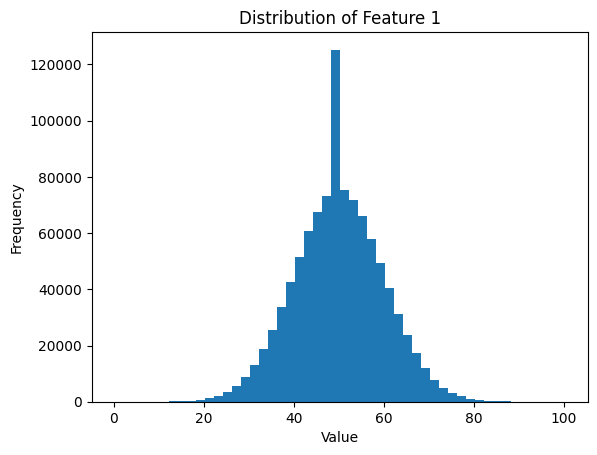

In [ ]:
# Visualization 1
import matplotlib.pyplot as plt

plt.figure()
plt.hist(features[:, 0], bins=50)
plt.title("Distribution of Feature 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


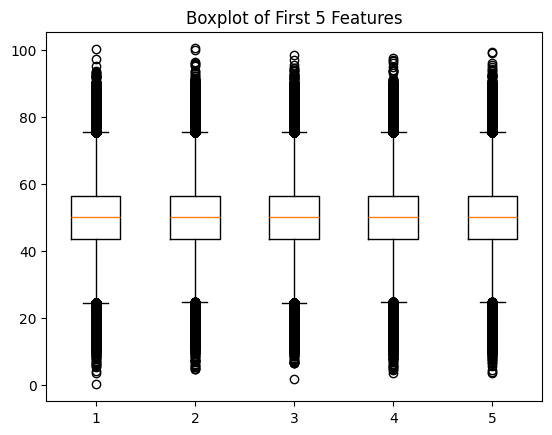

In [ ]:
# Visualization 2
plt.figure()
plt.boxplot(features[:, :5])
plt.title("Boxplot of First 5 Features")
plt.show()


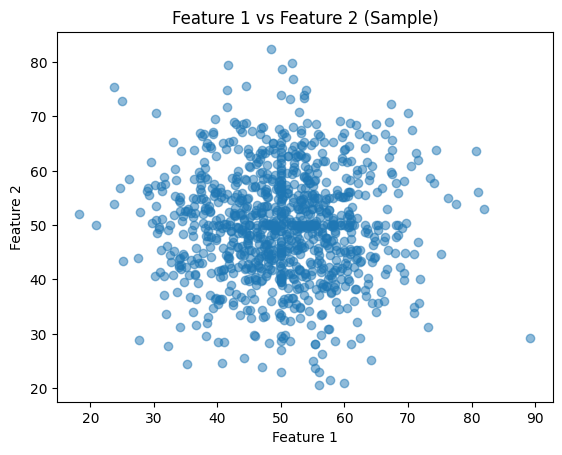

In [ ]:
# Visualization 3
plt.figure()
plt.scatter(features[:1000, 0], features[:1000, 1], alpha=0.5)
plt.title("Feature 1 vs Feature 2 (Sample)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
